In [415]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [5]:
df = pd.read_csv("60Activities-poseData.csv")

In [6]:
# Converting the string into a list
for i in df.columns.tolist()[1:]:
    split_str = [re.split(', |, |/[ |]', x.strip("[]")) for x in df[i].tolist()]
    convert= [[float(t) for t in l] for l in split_str]
    df[i]  = convert

In [7]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle
0,angled leg presses,"[0.6244075298309326, 0.6202492713928223, 0.625...","[0.6125868558883667, 0.6116636991500854, 0.614...","[-0.7317232489585876, -0.7084757089614868, -0....","[0.7274216413497925, 0.7407364845275879, 0.745...","[0.5923414826393127, 0.607475757598877, 0.6018...","[-0.2771779000759125, -0.31190672516822815, -0...","[0.45598286390304565, 0.4522373676300049, 0.45...","[0.7025633454322815, 0.7008029818534851, 0.700...","[-0.8455376625061035, -0.7739219665527344, -0....",...,"[-0.18987344205379486, -0.0501105897128582, -0...","[0.3456818461418152, 0.35185500979423523, 0.37...","[0.4793410003185272, 0.48256415128707886, 0.48...","[0.25488728284835815, 0.33376675844192505, 0.3...","[0.06234923005104065, 0.05919414758682251, 0.0...","[0.36329522728919983, 0.3608418405056, 0.36984...","[-0.06779885292053223, 0.08755621314048767, 0....","[0.24116382002830505, 0.23082193732261658, 0.2...","[0.3432755172252655, 0.34823083877563477, 0.34...","[0.41889476776123047, 0.49117857217788696, 0.4..."
1,arnold press,"[0.6750805377960205, 0.6730958819389343, 0.674...","[0.3685726225376129, 0.36425328254699707, 0.36...","[-0.023685937747359276, -0.028867069631814957,...","[0.47216328978538513, 0.47299060225486755, 0.4...","[0.3719647526741028, 0.368996262550354, 0.3686...","[-0.08193735778331757, -0.10326733440160751, -...","[0.6953715085983276, 0.6981197595596313, 0.706...","[0.4491013288497925, 0.44966304302215576, 0.45...","[-0.3566053807735443, -0.35106605291366577, -0...",...,"[-0.6593864560127258, -0.6449337601661682, -0....","[0.48968997597694397, 0.48874959349632263, 0.4...","[0.6085264682769775, 0.6103435158729553, 0.610...","[-0.8127835988998413, -0.8063545227050781, -0....","[0.7018957734107971, 0.7013241052627563, 0.701...","[0.742508590221405, 0.7433649301528931, 0.7421...","[-0.3053855001926422, -0.27191391587257385, -0...","[0.48945480585098267, 0.48833632469177246, 0.4...","[0.7392826080322266, 0.739270806312561, 0.7423...","[-0.3828478753566742, -0.3595616817474365, -0...."
2,back extensions,"[0.24804607033729553, 0.26040884852409363, 0.2...","[0.4517459571361542, 0.45352500677108765, 0.45...","[-0.3853210508823395, -0.37524843215942383, -0...","[0.23037508130073547, 0.23251590132713318, 0.2...","[0.4661741554737091, 0.46856704354286194, 0.47...","[0.28441742062568665, 0.28328651189804077, 0.2...","[0.37875789403915405, 0.3819432854652405, 0.38...","[0.4680253565311432, 0.4703821539878845, 0.469...","[-0.6757698059082031, -0.6794125437736511, -0....",...,"[-0.2013997733592987, -0.18110059201717377, -0...","[0.6978815793991089, 0.7043741941452026, 0.700...","[0.6545929908752441, 0.6574983596801758, 0.661...","[0.45003992319107056, 0.41382306814193726, 0.4...","[0.9378144145011902, 0.9393232464790344, 0.940...","[0.7470904588699341, 0.743262529373169, 0.7441...","[-0.1447303295135498, -0.076068215072155, -0.0...","[0.8562198877334595, 0.8520399332046509, 0.866...","[0.7071706056594849, 0.7047874331474304, 0.709...","[0.7344235777854919, 0.7165142893791199, 0.722..."
3,back presses,"[0.5400533080101013, 0.5398567914962769, 0.539...","[0.30235743522644043, 0.3022450804710388, 0.30...","[0.18136030435562134, 0.18636830151081085, 0.1...","[0.4811861217021942, 0.48017001152038574, 0.47...","[0.3090822100639343, 0.30989527702331543, 0.30...","[-0.02199406921863556, -0.012855282053351402, ...","[0.5700136423110962, 0.5703814625740051, 0.570...","[0.24835893511772156, 0.24547149240970612, 0.2...","[0.2516632080078125, 0.24780821800231934, 0.26...",...,"[-0.11309728771448135, -0.12462121993303299, -...","[0.5247339606285095, 0.5247664451599121, 0.525...","[0.5397233366966248, 0.543906033039093, 0.5451...","[-0.4834393858909607, -0.48

### Creating separate dataframes for X,Y and Z coordinates

In [17]:
df_x = df[['name','xX_left_shoulder','xX_right_shoulder','xX_left_elbow','xX_right_elbow','xX_left_wrist',
                    'xX_right_wrist','xX_left_hip','xX_right_hip','xX_left_knee','xX_right_knee','xX_left_ankle',
                    'xX_right_ankle']].copy()

In [156]:
df_x.head(2)

,name,xX_left_shoulder,xX_right_shoulder,xX_left_elbow,xX_right_elbow,xX_left_wrist,xX_right_wrist,xX_left_hip,xX_right_hip,xX_left_knee,xX_right_knee,xX_left_ankle,xX_right_ankle
0,angled leg presses,"[0.6244075298309326, 0.6202492713928223, 0.625...","[0.7274216413497925, 0.7407364845275879, 0.745...","[0.45598286390304565, 0.4522373676300049, 0.45...","[0.7777107954025269, 0.6347222328186035, 0.616...","[0.2811128497123718, 0.2741994559764862, 0.278...","[0.856555163860321, 0.47018447518348694, 0.496...","[0.3667226731777191, 0.3525211811065674, 0.362...","[0.4503536820411682, 0.43807917833328247, 0.44...","[0.2282884418964386, 0.23015110194683075, 0.25...","[0.3456818461418152, 0.35185500979423523, 0.37...","[0.06234923005104065, 0.05919414758682251, 0.0...","[0.24116382002830505, 0.23082193732261658, 0.2..."
1,arnold press,"[0.6750805377960205, 0.6730958819389343, 0.674...","[0.47216328978538513, 0.47299060225486755, 0.4...","[0.6953715085983276, 0.6981197595596313, 0.706...","[0.5051445364952087, 0.5004493594169617, 0.494...","[0.6991254687309265, 0.7039856314659119, 0.705...","[0.5013642907142639, 0.4989657402038574, 0.496...","[0.6346822381019592, 0.6359042525291443, 0.632...","[0.5117003917694092, 0.5119593739509583, 0.511...","[0.7330784797668457, 0.7351481318473816, 0.731...","[0.48968997597694397, 0.48874959349632263, 0.4...","[0.7018957734107971, 0.7013241052627563, 0.701...","[0.48945480585098267, 0.48833632469177246, 0.4..."


In [23]:
df_y = df[['name','yY_left_shoulder','yY_right_shoulder','yY_left_elbow','yY_right_elbow','yY_left_wrist',
                    'yY_right_wrist','yY_left_hip','yY_right_hip','yY_left_knee','yY_right_knee','yY_left_ankle',
                    'yY_right_ankle']].copy()

In [24]:
df_z = df[['name','zZ_left_shoulder','zZ_right_shoulder','zZ_left_elbow','zZ_right_elbow','zZ_left_wrist',
                    'zZ_right_wrist','zZ_left_hip','zZ_right_hip','zZ_left_knee','zZ_right_knee','zZ_left_ankle',
                    'zZ_right_ankle']].copy()

### Saving the joint names and exercise names into separate variables

In [42]:
joints = [df.columns[i][3:] for i in np.arange(1,36,3)]
exercises = df['name']

In [43]:
joints

['left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

In [45]:
exercises.head()

0        angled leg presses
1              arnold press
2           back extensions
3              back presses
4    bar triceps extensions
Name: name, dtype: object

### Angle_list contains the points between which angles are measured

In [29]:
# There are 8 angles measured
angle_list = [
    ['right_shoulder', 'left_shoulder', 'left_elbow'],
    ['left_shoulder', 'right_shoulder', 'right_elbow'],
    ['left_shoulder', 'left_elbow', 'left_wrist'],
    ['right_shoulder', 'right_elbow', 'right_wrist'],
    ['left_shoulder', 'left_hip', 'left_knee'],
    ['right_shoulder', 'right_hip', 'right_knee'],
    ['left_hip', 'left_knee', 'left_ankle'],
    ['right_hip', 'right_knee', 'right_ankle']]

In [89]:
# Just a string operation to stick the xX,yY,zZ values with these angle list
coor =['xX','yY','zZ']
coordinates =[]

for w in range(len(angle_list)) :
    for i in range(len(angle_list[w])) :
        for c in range(len(coor)) :
            temp = coor[c] + '_' + angle_list[w][i]
            coordinates.append(temp)

### Creating separate dictionaries for the 8 angles

In [104]:
exercise_dict1 = {key: [] for key in exercises}
exercise_dict2 = {key: [] for key in exercises}
exercise_dict3 = {key: [] for key in exercises}
exercise_dict4 = {key: [] for key in exercises}
exercise_dict5 = {key: [] for key in exercises}
exercise_dict6 = {key: [] for key in exercises}
exercise_dict7 = {key: [] for key in exercises}
exercise_dict8 = {key: [] for key in exercises}

### Computing the angles for all exercises

In [126]:
# Angle 1 - ['right_shoulder', 'left_shoulder', 'left_elbow']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_right_shoulder'][exer][i], df_y['yY_right_shoulder'][exer][i],df_z['zZ_right_shoulder'][exer][i]])
        b = np.array([df_x['xX_left_shoulder'][exer][i], df_y['yY_left_shoulder'][exer][i], df_z['zZ_left_shoulder'][exer][i]])
        c = np.array([df_x['xX_left_elbow'][exer][i], df_y['yY_left_elbow'][exer][i],df_z['zZ_left_elbow'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict1[exercises[exer]] = degree_list_angle1
    

In [421]:
exercise_dict1

{'angled leg presses': [133,
  123,
  123,
  118,
  115,
  126,
  131,
  126,
  122,
  118,
  118,
  122,
  122,
  114,
  120,
  121,
  130,
  131,
  135,
  132,
  125,
  139,
  129,
  130,
  133,
  126,
  133,
  121,
  134,
  127,
  126,
  136,
  117,
  116,
  126,
  131,
  121,
  122,
  115,
  117,
  118,
  120,
  118,
  118,
  117,
  123,
  129,
  123,
  129,
  140,
  129,
  130,
  138,
  132,
  133,
  137,
  134,
  133,
  139,
  126,
  109,
  145,
  123,
  122,
  124,
  121,
  119,
  124,
  122,
  119,
  117,
  115,
  109,
  105,
  102,
  112,
  109,
  119,
  117,
  121,
  114,
  115,
  116,
  115,
  117,
  120,
  119,
  121,
  121,
  122,
  121,
  124,
  117,
  123,
  120,
  105,
  108,
  109,
  112,
  113,
  113,
  113,
  145,
  146,
  60,
  104,
  135,
  129,
  110,
  122,
  116,
  118,
  135,
  124,
  141,
  150,
  131,
  132,
  129,
  124,
  131,
  123,
  124,
  130,
  129,
  129,
  148,
  145,
  136,
  141,
  131,
  161,
  127,
  147,
  149,
  132,
  136,
  131,
  137,
  139,

In [115]:
# Angle 2 - ['left_shoulder', 'right_shoulder', 'right_elbow']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_left_shoulder'][exer][i], df_y['yY_left_shoulder'][exer][i],df_z['zZ_left_shoulder'][exer][i]])
        b = np.array([df_x['xX_right_shoulder'][exer][i], df_y['yY_right_shoulder'][exer][i], df_z['zZ_right_shoulder'][exer][i]])
        c = np.array([df_x['xX_right_elbow'][exer][i], df_y['yY_right_elbow'][exer][i],df_z['zZ_right_elbow'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict2[exercises[exer]] = degree_list_angle1
    

In [116]:
# Angle 3 - ['left_shoulder', 'left_elbow', 'left_wrist']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_left_shoulder'][exer][i], df_y['yY_left_shoulder'][exer][i],df_z['zZ_left_shoulder'][exer][i]])
        b = np.array([df_x['xX_left_elbow'][exer][i], df_y['yY_left_elbow'][exer][i], df_z['zZ_left_elbow'][exer][i]])
        c = np.array([df_x['xX_left_wrist'][exer][i], df_y['yY_left_wrist'][exer][i],df_z['zZ_left_wrist'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict3[exercises[exer]] = degree_list_angle1
    

In [117]:
# Angle 4 - ['right_shoulder', 'right_elbow', 'right_wrist']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_right_shoulder'][exer][i], df_y['yY_right_shoulder'][exer][i],df_z['zZ_right_shoulder'][exer][i]])
        b = np.array([df_x['xX_right_elbow'][exer][i], df_y['yY_right_elbow'][exer][i], df_z['zZ_right_elbow'][exer][i]])
        c = np.array([df_x['xX_right_wrist'][exer][i], df_y['yY_right_wrist'][exer][i],df_z['zZ_right_wrist'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict4[exercises[exer]] = degree_list_angle1
    

In [118]:
# Angle 5 - ['left_shoulder', 'left_hip', 'left_knee']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_left_shoulder'][exer][i], df_y['yY_left_shoulder'][exer][i],df_z['zZ_left_shoulder'][exer][i]])
        b = np.array([df_x['xX_left_hip'][exer][i], df_y['yY_left_hip'][exer][i], df_z['zZ_left_hip'][exer][i]])
        c = np.array([df_x['xX_left_knee'][exer][i], df_y['yY_left_knee'][exer][i],df_z['zZ_left_knee'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict5[exercises[exer]] = degree_list_angle1
    

In [119]:
# Angle 6 - ['right_shoulder', 'right_hip', 'right_knee']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_right_shoulder'][exer][i], df_y['yY_right_shoulder'][exer][i],df_z['zZ_right_shoulder'][exer][i]])
        b = np.array([df_x['xX_right_hip'][exer][i], df_y['yY_right_hip'][exer][i], df_z['zZ_right_hip'][exer][i]])
        c = np.array([df_x['xX_right_knee'][exer][i], df_y['yY_right_knee'][exer][i],df_z['zZ_right_knee'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict6[exercises[exer]] = degree_list_angle1
    

In [120]:
# Angle 7 - ['left_hip', 'left_knee', 'left_ankle']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_left_hip'][exer][i], df_y['yY_left_hip'][exer][i],df_z['zZ_left_hip'][exer][i]])
        b = np.array([df_x['xX_left_knee'][exer][i], df_y['yY_left_knee'][exer][i], df_z['zZ_left_knee'][exer][i]])
        c = np.array([df_x['xX_left_ankle'][exer][i], df_y['yY_left_ankle'][exer][i],df_z['zZ_left_ankle'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict7[exercises[exer]] = degree_list_angle1
    

In [121]:
# Angle 8 - ['right_hip', 'right_knee', 'right_ankle']
for exer in range(len(exercises)) : 
    
    degree_list_angle1=[]
    
    for i in range(len(df_x['xX_right_shoulder'][exer])) : 
        
        a = np.array([df_x['xX_right_hip'][exer][i], df_y['yY_right_hip'][exer][i],df_z['zZ_right_hip'][exer][i]])
        b = np.array([df_x['xX_right_knee'][exer][i], df_y['yY_right_knee'][exer][i], df_z['zZ_right_knee'][exer][i]])
        c = np.array([df_x['xX_right_ankle'][exer][i], df_y['yY_right_ankle'][exer][i],df_z['zZ_right_ankle'][exer][i]])
        
        ba = a - b
        bc = c - b
        
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        degree = np.rad2deg(angle).astype(int)
        
        degree_list_angle1.append(degree)
        
    
    exercise_dict8[exercises[exer]] = degree_list_angle1


In [182]:
angle_combined_dataframe = {}

In [359]:
for exe in range(len(exercises)) : 
    
    angle_combined_dataframe[exercises[exe]] = pd.concat([pd.DataFrame.from_dict(d) for d in [exercise_dict1[exercises[exe]],
                                                           exercise_dict2[exercises[exe]],
                                                           exercise_dict3[exercises[exe]],
                                                           exercise_dict4[exercises[exe]],
                                                           exercise_dict5[exercises[exe]],
                                                           exercise_dict6[exercises[exe]],
                                                           exercise_dict7[exercises[exe]],
                                                           exercise_dict8[exercises[exe]]]],1)
    angle_combined_dataframe[exercises[exe]].columns =  ['angle_1','angle_2','angle_3','angle_4','angle_5','angle_6','angle_7','angle_8']

In [409]:
angle_combined_dataframe

{'angled leg presses':      angle_1  angle_2  angle_3  angle_4  angle_5  angle_6  angle_7  angle_8
 0        133      174      150      170       91      135      137      169
 1        123       90      158      140      121      143      164      168
 2        123       83      163      141      115      141      154      158
 3        118       99      157      125      102      134      145      156
 4        115       86      159      125       88      111      141      150
 ..       ...      ...      ...      ...      ...      ...      ...      ...
 214      119      111      151      133      120      107      161      157
 215      122       96      155      145      145      145      167      172
 216      120       98      153      134      147      148      171      174
 217      123       92      153      141      146      148      175      172
 218      119      101      152      141      144      145      178      170
 
 [219 rows x 8 columns],
 'arnold press':      angle

In [360]:
angle_combined_dataframe['angled leg presses']

,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8
0,133,174,150,170,91,135,137,169
1,123,90,158,140,121,143,164,168
2,123,83,163,141,115,141,154,158
3,118,99,157,125,102,134,145,156
4,115,86,159,125,88,111,141,150
...,...,...,...,...,...,...,...,...
214,119,111,151,133,120,107,161,157
215,122,96,155,145,145,145,167,172
216,120,98,153,134,147,148,171,174
217,123,92,153,141,146,148,175,172


Text(0, 0.5, 'Angle')

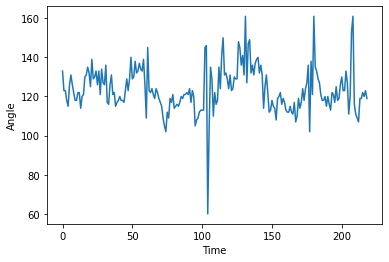

In [418]:
plt.plot(angle_combined_dataframe['angled leg presses'].angle_1)
plt.xlabel("Time")
plt.ylabel("Angle")

In [363]:
diff_angle = ['angle_1','angle_2','angle_3','angle_4','angle_5','angle_6','angle_7','angle_8']

In [365]:
np.mean(angle_combined_dataframe['angled leg presses'].angle_1)

123.52511415525115

In [366]:
# Checking the standard deviation values for all angles for all exercises
for x in range(len(exercises)) :
    print(exercises[x],'\n')
    print(np.std(angle_combined_dataframe[exercises[x]]))
    print('\n')

angled leg presses 

angle_1    11.465376
angle_2    25.179360
angle_3    21.415177
angle_4    16.536081
angle_5    38.554176
angle_6    33.405105
angle_7    44.683093
angle_8    40.516189
dtype: float64


arnold press 

angle_1    23.373452
angle_2    20.947258
angle_3     6.812727
angle_4    17.336898
angle_5    13.457306
angle_6    19.458182
angle_7     4.541501
angle_8     4.059855
dtype: float64


back extensions 

angle_1    25.610019
angle_2    57.751797
angle_3    33.123823
angle_4    27.332127
angle_5    22.053769
angle_6    11.048593
angle_7    10.861164
angle_8    13.825547
dtype: float64


back presses 

angle_1    23.594780
angle_2    31.135052
angle_3    27.199291
angle_4    23.617796
angle_5     7.376652
angle_6     6.852332
angle_7     6.564561
angle_8     7.322122
dtype: float64


bar triceps extensions 

angle_1    11.875933
angle_2    22.394513
angle_3    22.871468
angle_4    26.484497
angle_5     4.569930
angle_6     5.551748
angle_7     3.695990
angle_8     5.99751

In [368]:
angle_combined_dataframe['angled leg presses']['angle_1']

0      133
1      123
2      123
3      118
4      115
      ... 
214    119
215    122
216    120
217    123
218    119
Name: angle_1, Length: 219, dtype: int64

In [369]:
# Calculating 3 metrices to identify the moving joints
# Metrices : Mean, Standard deviation, (Max degree- Min degree)
df_mov = pd.DataFrame()

for act in range(len(exercises)) :
    for ang in diff_angle:
        
        deg = angle_combined_dataframe[exercises[act]][ang]
        df_mov = pd.concat([df_mov, pd.DataFrame(np.array([exercises[act], ang, 
                                                           np.mean(deg), np.std(deg), 
                                                           (np.max(deg)-np.min(deg))]).T)], axis =1)

In [370]:
df_mov.columns = df_mov.iloc[0]

In [371]:
df_mov = df_mov.iloc[1: , :]

In [372]:
df_mov

,angled leg presses,angled leg presses,angled leg presses,angled leg presses,angled leg presses,angled leg presses,angled leg presses,angled leg presses,arnold press,arnold press,...,upright rows,upright rows,wrist curls,wrist curls,wrist curls,wrist curls,wrist curls,wrist curls,wrist curls,wrist curls
1,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8,angle_1,angle_2,...,angle_7,angle_8,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8
2,123.52511415525115,103.22374429223744,149.0456621004566,135.89954337899545,97.01369863013699,103.32876712328768,121.50228310502283,127.99086757990868,137.81990521327015,78.70142180094787,...,147.58659217877096,142.4385474860335,100.11070110701107,77.53136531365314,123.75276752767527,127.40221402214023,32.88191881918819,48.904059040590404,59.24354243542435,60.45387453874539
3,11.465376083289234,25.17935993630881,21.415176560530643,16.53608064995503,38.55417577749236,33.405105067919436,44.683092573262186,40.51618886858092,23.373452393009178,20.947258252817612,...,11.293051163785268,7.502354945867242,10.294676546210948,12.100666840646316,18.984984883122166,10.291894613194515,11.732602162934906,26.557290681115,20.93796197479099,30.78128855068202
4,101,164,138,111,158,141,149,142,103,90,...,49,37,44,53,107,48,69,103,78,108


In [373]:
mean_angle_std_dict ={}
for exe in exercises : 
    for t in range(8) : 
        temp_list.append((float([df_mov[exe].iloc[2]][0][t])))
    
    mean_angle_std_dict[exe]= np.mean(temp_list)


In [374]:
mean_angle_std_dict

{'angled leg presses': 25.585073620137198,
 'arnold press': 25.520392329364046,
 'back extensions': 25.51865571337685,
 'back presses': 25.471029591654304,
 'bar triceps extensions': 25.40360577498109,
 'barbell bench press': 25.49044770000476,
 'barbell curls': 25.434342834140285,
 'barbell front raise': 25.36814929378062,
 'barbell lunge': 25.3802958845599,
 'bench jump': 25.41638201335135,
 'bench presses': 25.387615692294577,
 'bent over row': 25.345718528910062,
 'brbell shrugs': 25.243515714148153,
 'cable crossover flys': 25.215560620378138,
 'chin-ups': 25.17414493747515,
 'close-grip bench presses': 25.139370132143974,
 'concentration curls': 25.082636721472905,
 'crunches': 25.019890864058738,
 'deadlifts': 25.042361634447573,
 'dumbbell flys': 25.03238602070335,
 'dumbbell lunges': 24.99742498347828,
 'dumbbell press': 24.9956788956001,
 'dumbbell presses': 24.97536803106217,
 'dumbbell pullovers': 24.919984699383445,
 'dumbbell scarecrow': 24.89940225131312,
 'dumbbell shru

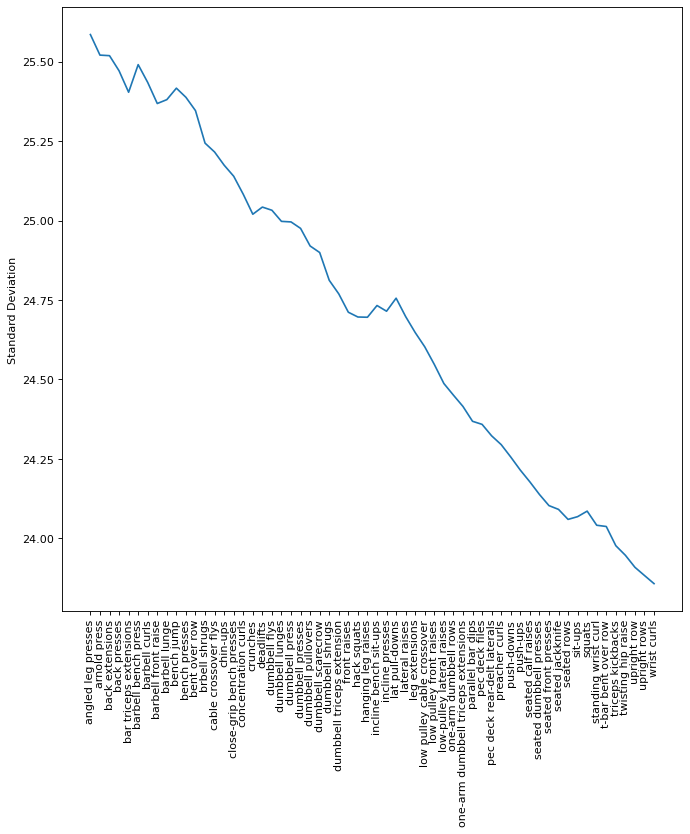

In [420]:
figure(figsize=(10, 10), dpi=80)
names = list(mean_angle_std_dict.keys())
values = list(mean_angle_std_dict.values())
plt.plot(names,values)
plt.xticks(rotation = 90)
plt.ylabel("Standard Deviation")
plt.show()

In [375]:
df_mov['arnold press']

,arnold press,arnold press,arnold press,arnold press,arnold press,arnold press,arnold press,arnold press
1,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8
2,137.81990521327015,78.70142180094787,150.83412322274881,146.82938388625593,79.38388625592417,96.99526066350711,25.018957345971565,22.81516587677725
3,23.373452393009178,20.947258252817612,6.81272656053416,17.33689841176429,13.457305705086096,19.458181585627628,4.541501187503458,4.059855172862401
4,103,90,37,84,60,78,25,21


In [408]:
for exe in exercises : 
    for r in range(8) :
        if (((float([df_mov[exe].iloc[2]][0][r])) > mean_angle_std_dict[exe])): 
            print("Exercise : ", exe, "\nMoving angles : ",([df_mov[exe].iloc[0]][0][r]) )
            
            ang_res = [int(i) for i in ([df_mov[exe].iloc[0]][0][r]).split('_') if i.isdigit()]
            ang_res[0] = ang_res[0]-1
            print("Moving Joints : ", angle_list[ang_res[0]] )
            
    print("\n")

Exercise :  angled leg presses 
Moving angles :  angle_5
Moving Joints :  ['left_shoulder', 'left_hip', 'left_knee']
Exercise :  angled leg presses 
Moving angles :  angle_6
Moving Joints :  ['right_shoulder', 'right_hip', 'right_knee']
Exercise :  angled leg presses 
Moving angles :  angle_7
Moving Joints :  ['left_hip', 'left_knee', 'left_ankle']
Exercise :  angled leg presses 
Moving angles :  angle_8
Moving Joints :  ['right_hip', 'right_knee', 'right_ankle']




Exercise :  back extensions 
Moving angles :  angle_1
Moving Joints :  ['right_shoulder', 'left_shoulder', 'left_elbow']
Exercise :  back extensions 
Moving angles :  angle_2
Moving Joints :  ['left_shoulder', 'right_shoulder', 'right_elbow']
Exercise :  back extensions 
Moving angles :  angle_3
Moving Joints :  ['left_shoulder', 'left_elbow', 'left_wrist']
Exercise :  back extensions 
Moving angles :  angle_4
Moving Joints :  ['right_shoulder', 'right_elbow', 'right_wrist']


Exercise :  back presses 
Moving angles :  ang